In [60]:
import pandas as pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#load data from folder
data = pandas.read_excel("TitanicAnalysis/data/dataSophie.xlsx")


#data.replace('nan', 'none', regex=True)
# alleen geinteresseerd in rijen 1-999 and kolommen 19-999 
# AKA skip first row (question text) and first 19 columns (misc. info)
data = data.iloc[1:999, 19:999]

# Replace unanswered questions with 'NA'
#data = data.replace(np.nan, "NA", regex=True)


<AxesSubplot:>

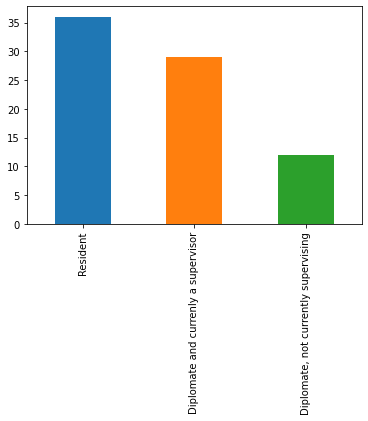

In [61]:
# HISTOGRAM maken

# Sla de data van vraag 1 op in een var genaamd 'Q1',
# Q1 is een zogenaamde 'subset' van de volledige dataset
Q1 = data["Q1"]

# Bar plot onze subset als verticale bars
# kan eventueel ook als 'barh', dan wordt ie horizontaal
Q1.value_counts().plot(kind='bar',  color=['C0', 'C1', 'C2'])
  


/Users/franshuntink/miniconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


[Text(0.5, 0, 'Function'), Text(0, 0.5, 'Avg. cases by resident per week')]

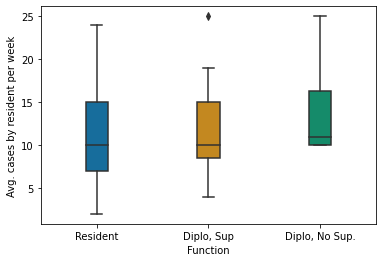

In [62]:
#BOXPLOT

# Boxplot heeft twee dimensies (columns) nodig, x en y
# in dit geval houdt combi de columns Q1 en Q60_1 vast (een numerieke en een categoriaal)
combi = data[["Q1", "Q60_1"]]


# Optioneel: Verkort de namen van iedere categorie om 'm iets leesbaarder
# te maken. Je kan ook groepen maken (A, B,C of 1, 2, 3) en een legenda provide
combi.replace({'Diplomate and currenly a supervisor': 'Diplo, Sup', 'Diplomate, not currently supervising': 'Diplo, No Sup.'}, inplace=True)

# Knal er een boxplot uit. 
# Bij y en x geef je de column naam aan van de beide axes,
# bij data de gehele dataset waaruit deze columns getrokken moeten worden aha
# Bij .set de label namen die je ziet in de plot
sns.boxplot(y='Q60_1', x='Q1', 
                 data=combi, 
                 width=0.2,
                 palette="colorblind").set(xlabel='Function', ylabel = 'Avg. cases by resident per week')




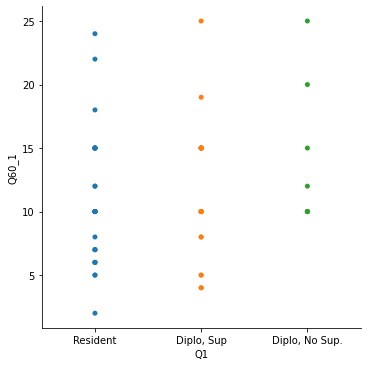

In [64]:
# SCATTER PLOT

# Knal er een scatter plotje uit, zelfde als boxplot
# in opzet (zie hierboven)
sns.catplot(x="Q1", y="Q60_1", jitter=False, data=combi)

In [65]:

# (optioneel) - je kan in plaats van text categories ("resident, "resident and currently a sup", "resident not currently a sup..") 
# nummers geven. Soms is dit handiger. Is niet lastig: 
# 0 = resident, 
# 1 = resident + sup, 
# 2 = resident + geen sup 

# Instructie om subset 'Q1' van hierboven te factorisen
fac = Q1.factorize()[0]

# Nieuwe kolom in de dataset maken en de factorials op te slaan
data["Q1_CATEGORIAL"] = fac

# laat hieronder de takkie zien
data["Q1_CATEGORIAL"]

1     0
2     0
3     0
4     0
5     1
     ..
87    2
88   -1
89    0
90   -1
91    0
Name: Q1_CATEGORIAL, Length: 91, dtype: int64

In [66]:
# COMBINEREN DIPLOMATS & RESIDENTS

# Maak nieuwe kolom aan in de Data tabel genaamd 'Q1_alt',
# Gebaseerd op alle data in originele kolom Q1
data['Q1_alt'] = data["Q1"]

# Vervang beide categorieën voor 'Diplomat'.
# De nieuwe kolom vind je op de laatste plek in je data (helemaal rechts)
data['Q1_alt'].replace({'Diplomate and currenly a supervisor': 'Diplomate', 'Diplomate, not currently supervising': 'Diplomate'}, inplace=True)


In [68]:
# PERCENTAGES PER CATEGORIE

# Pak een subset van de data, in dit geval willen we de percentages per categorie weten van
# de Q1 kolom die categoriale data bevat over de functie van respondenten 
groups = data['Q1'].value_counts().to_frame()

# Maak een nieuwe kolom aan in de zojuist gemaakte subset genaamd
# groups genaamd percentages en zet daar de gemiddeldes per categorie in
# Formule voor nieuwe kolom:
# [Observaties van bepaalde groep] / [Totale aantal niet-NA observaties] * 100
groups['percentage'] = (groups["Q1"] / groups["Q1"].sum()) * 100  

print(groups)

                                      Q1  percentage
Resident                              36   46.753247
Diplomate and currenly a supervisor   29   37.662338
Diplomate, not currently supervising  12   15.584416


In [69]:
# GEMIDDELDE PER KOLOM EN MEDIAAN (NUMERIEK)

# Pak een subset van de data uit kolom Q42_1
numeric_data = data["Q42_1"]

# Bereken het gemiddelde van deze kolom 
# en de mediaan
mean = numeric_data.mean()
median = numeric_data.median()

# Print dit
print(mean)
print(median)

# Gruwelijk he

74.31746031746032
80.0


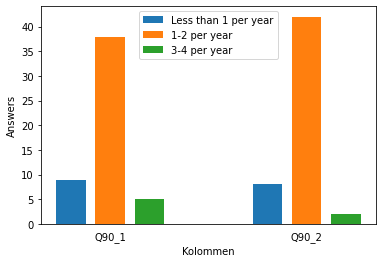

In [67]:
# Plotten van twee bar graphs naast elkaar
# met data afkomstig uit twee kolommen

# Zoek value counts van beide kolommen
# Dit geeft bijvoorbeeld terug:
# < 1 per year: 9
# 1-2 per year: 38
# 3-4 per year: 5
valueCountsColumn1 = data['Q90_1'].value_counts()
valueCountsColumn2 = data['Q90_2'].value_counts()

# Daarna trekken we alle data uit de column counts die
# we hierboven hebben opgevraagd uit de dataset

y1 = [valueCountsColumn1[1], valueCountsColumn2[1]]     #blue   < 1 p/year van [Q90_1 en Q90_2]
y2 = [valueCountsColumn1[0], valueCountsColumn2[0]]     #orange 1-2 p/year van [Q90_1 en Q90_2]
y3 = [valueCountsColumn1[2], valueCountsColumn2[2]]     #green  3-4 p/year van [Q90_1 en Q90_2]

# Breedte van iedere bar
width = 0.15
x = np.arange(2)

# plot data in grouped manner of bar type
plt.bar(x, y1, width)
plt.bar(x+0.2, y2, width)
plt.bar(x+0.4, y3, width)

plt.ylabel("Answers")
plt.xlabel("Kolommen")
plt.legend(["Less than 1 per year", "1-2 per year", "3-4 per year"])
plt.xticks(x+0.2, ['Q90_1', 'Q90_2'])

# Zet ticks (streepjes per interval) op de x-as
# uit, omdat deze geen echte waarde kennen..
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# Laat maar zien die plot aha x 
plt.show()

182


<AxesSubplot:>

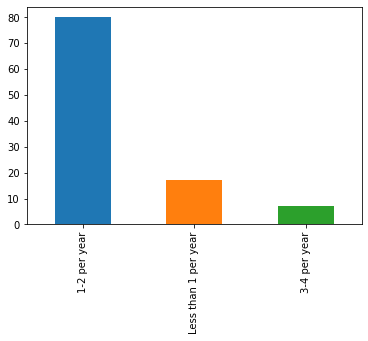

In [63]:
# Som van twee kolommen samen plotten (dus van ~90 responses naar ~180)

sum = data["Q90_1"].append(data["Q90_2"])
print(len(sum))
sum.value_counts().plot(kind='bar',  color=['C0', 'C1', 'C2'])